# Trabalho de MLOps

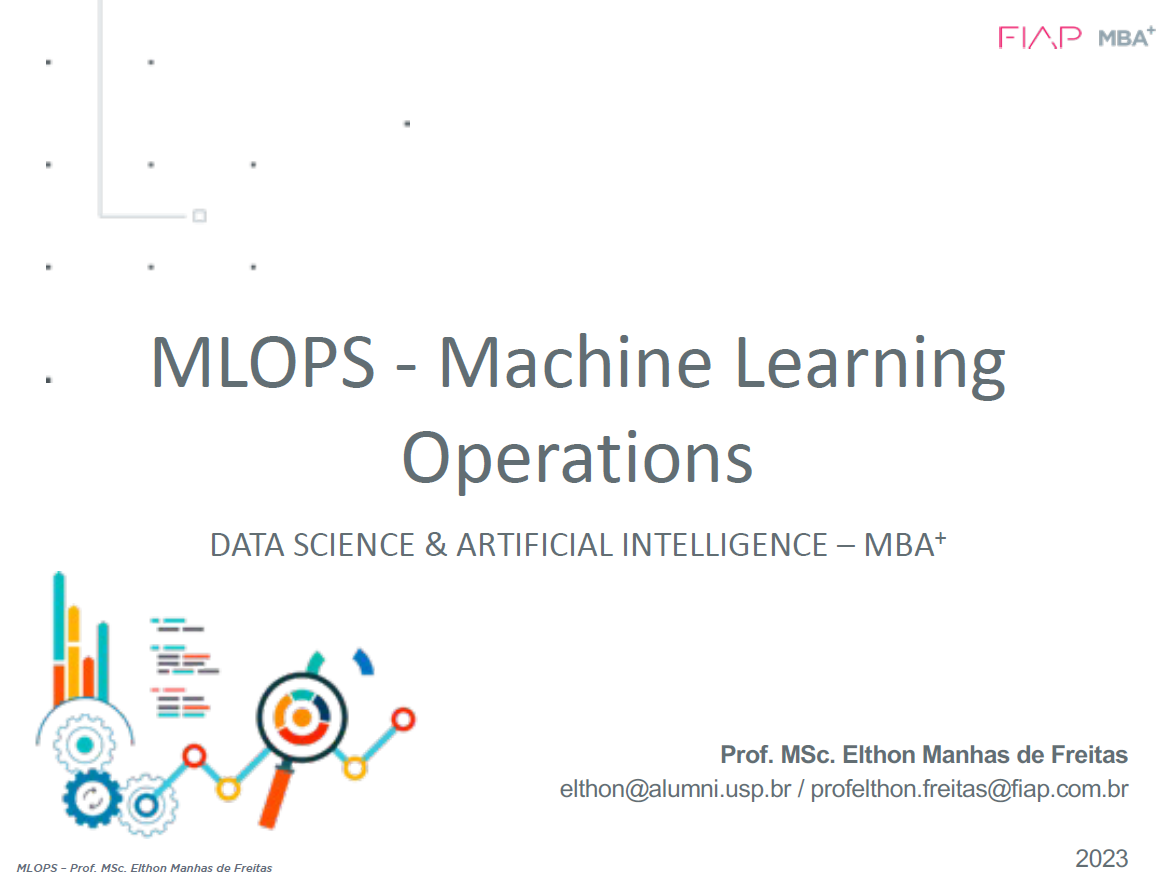

## Integrantes do Grupo:

* Marcus Vinicius Fugagnoli Laranjeira - RM 346611 - mvlaran@gmail.com
* Suélen Canabarro Oliveira Andrade - RM 346431 - suelen.canabarro@hotmail.com
* Rafael Alves Gama - RM 347064 - rafael.allvesgama@gmail.com

## Imports

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

from tqdm import tqdm
import joblib

## Configurações

In [2]:
RANDOM_STATE = 73

## Carga e Análises Iniciais do Dataset

In [3]:
df = pd.read_csv('loan_default.csv')

In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,148670.0,NaN,NaN,NaN,99224.5,42917.476598,24890.0,62057.25,99224.5,136391.75,173559.0
year,148670.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,145326,2,cf,135348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,148670,4,Male,42346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,147762,2,nopre,124621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,148670,3,type1,113173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,148536,4,p3,55934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,148670,2,l1,142344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,148670,2,nopc,148114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,148670,2,nob/c,127908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Tratamento de Nulos, Duplicatas e Colunas Desnecessárias

In [5]:
df.isnull().sum()/df.shape[0] * 100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

Descartar colunas com mais de 10% de nulos, exceto `property_value` que usaremos técnica de preenchimento para resolver os nulos.

In [6]:
df.drop(columns = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'LTV', 'dtir1'], inplace = True)

In [7]:
df.isnull().sum()/df.shape[0] * 100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score                  0.000000
co_applicant_credit_type      0.000000
age                           0.134526
submission_of_application

In [8]:
df.dropna(subset=['age'], inplace = True)

In [9]:
df.isnull().sum()/df.shape[0] * 100

ID                            0.000000
year                          0.000000
loan_limit                    2.244224
Gender                        0.000000
approv_in_adv                 0.611571
loan_type                     0.000000
loan_purpose                  0.084866
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
term                          0.027615
Neg_ammortization             0.081498
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.169058
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.028154
credit_type                   0.000000
Credit_Score                  0.000000
co_applicant_credit_type      0.000000
age                           0.000000
submission_of_application

In [10]:
df.dropna(subset=['term','Neg_ammortization', 'loan_purpose', 'loan_limit'], inplace = True)

In [11]:
df.isnull().sum()/df.shape[0] * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.626855
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.144287
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.120124
credit_type                   0.000000
Credit_Score                  0.000000
co_applicant_credit_type      0.000000
age                           0.000000
submission_of_application

Vamos colocar preencher com zero income e property_value assumindo que seus nulos signifiquem zero, ou seja, a pessoa não tem renda e não tem um imóvel/propriedade.

In [12]:
df[['property_value', 'income']] = df[['property_value', 'income']].fillna(0)

In [13]:
df.isnull().sum()/df.shape[0] * 100

ID                           0.000000
year                         0.000000
loan_limit                   0.000000
Gender                       0.000000
approv_in_adv                0.626855
loan_type                    0.000000
loan_purpose                 0.000000
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
term                         0.000000
Neg_ammortization            0.000000
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.000000
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       0.000000
credit_type                  0.000000
Credit_Score                 0.000000
co_applicant_credit_type     0.000000
age                          0.000000
submission_of_application    0.000000
Region      

In [14]:
df['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

In [15]:
df['approv_in_adv'] = df['approv_in_adv'].fillna('nopre')

In [16]:
df.isnull().sum()/df.shape[0] * 100

ID                           0.0
year                         0.0
loan_limit                   0.0
Gender                       0.0
approv_in_adv                0.0
loan_type                    0.0
loan_purpose                 0.0
Credit_Worthiness            0.0
open_credit                  0.0
business_or_commercial       0.0
loan_amount                  0.0
term                         0.0
Neg_ammortization            0.0
interest_only                0.0
lump_sum_payment             0.0
property_value               0.0
construction_type            0.0
occupancy_type               0.0
Secured_by                   0.0
total_units                  0.0
income                       0.0
credit_type                  0.0
Credit_Score                 0.0
co_applicant_credit_type     0.0
age                          0.0
submission_of_application    0.0
Region                       0.0
Security_Type                0.0
Status                       0.0
dtype: float64

In [17]:
df['Status'].value_counts()

0    109354
1     35496
Name: Status, dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(144850, 29)

In [20]:
for coluna in df.columns:
    if len(df[coluna].unique()) == 1:
        print(coluna + ':', df[coluna].unique())

year: [2019]


Removemos a coluna ID por não ser relevante e a coluna year, por ter apenas um único valor.

In [21]:
df.drop(columns = ['ID', 'year'], inplace = True, axis = 1)

### Escolha das Variáveis para o Modelo

Neste momento, faríamos uma Análise Exploratória minusciosa e Feature Engineering para preparar da melhor forma possível os dados, porém, para fins do presente trabalho de MLOps, e desenvolver um Projeto Integrado, escolheremos algumas variáveis que façam sentido semântico para fins e demonstração e utilizaremos elas no modelo.

São elas:

`Gender`, `approv_in_adv`, `property_value`, `income`, `Credit_Score`, `age`, `Region` e `Status` (target).

In [22]:
df = df[['Gender', 'approv_in_adv', 'property_value', 'income', 'Credit_Score', 'age', 'Region', 'Status']].copy()

### Tratamento e Preparação dos Dados para os Modelos de ML

In [23]:
categoricas = [coluna for coluna in df.columns if df[coluna].dtype == 'object' or df[coluna].dtype.name == 'category']
print(categoricas)

['Gender', 'approv_in_adv', 'age', 'Region']


In [24]:
df['Gender'].value_counts()

Male                 41255
Joint                40432
Sex Not Available    36603
Female               26560
Name: Gender, dtype: int64

In [25]:
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [26]:
df['Gender'].value_counts()

Male      77858
Joint     40432
Female    26560
Name: Gender, dtype: int64

In [27]:
df['approv_in_adv'].value_counts()

nopre    121908
pre       22942
Name: approv_in_adv, dtype: int64

In [28]:
df['age'].value_counts()

45-54    33902
35-44    32008
55-64    31734
65-74    20274
25-34    18593
>74       7035
<25       1304
Name: age, dtype: int64

In [29]:
df['Region'].value_counts()

North         72861
south         62327
central        8450
North-East     1212
Name: Region, dtype: int64

In [31]:
df[['property_value', 'income', 'Credit_Score']].describe()

,property_value,income,Credit_Score
count,1.448500e+05,144850.000000,144850.000000
mean,4.486231e+05,6535.690024,699.710832
std,3.741065e+05,6509.447522,115.892422
min,0.000000e+00,0.000000,500.000000
25%,2.280000e+05,3360.000000,599.000000
50%,3.880000e+05,5460.000000,699.000000
75%,5.980000e+05,8280.000000,800.000000
max,1.650800e+07,578580.000000,900.000000


Vamos tratar as variáveis categóricas com técnica de Label Encoding, para reproduzir com facilidade no sistema online de predição que iremos montar.

In [32]:
categoricas = [coluna for coluna in df.columns if df[coluna].dtype == 'object' or df[coluna].dtype.name == 'category']
print(categoricas)

['Gender', 'approv_in_adv', 'age', 'Region']


In [33]:
numericas = [coluna for coluna in df.columns if coluna != 'Status' and df[coluna].dtype != 'object' and df[coluna].dtype.name != 'category']
print(numericas)

['property_value', 'income', 'Credit_Score']


In [34]:
# guardamos os Label Encoders para ser possível exportar e reutilizar
encoders = {}
for categorica in categoricas:
    label_encoder = LabelEncoder()
    df[categorica] = label_encoder.fit_transform(df[categorica])
    encoders[categorica] = label_encoder

In [35]:
encoders

{'Gender': LabelEncoder(),
 'approv_in_adv': LabelEncoder(),
 'age': LabelEncoder(),
 'Region': LabelEncoder()}

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,144850.0,1.354146,0.771657,0.0,1.0,2.0,2.0,2.0
approv_in_adv,144850.0,0.158385,0.365102,0.0,0.0,0.0,0.0,1.0
property_value,144850.0,448623.113566,374106.537896,0.0,228000.0,388000.0,598000.0,16508000.0
income,144850.0,6535.690024,6509.447522,0.0,3360.0,5460.0,8280.0,578580.0
Credit_Score,144850.0,699.710832,115.892422,500.0,599.0,699.0,800.0,900.0
age,144850.0,2.242596,1.520731,0.0,1.0,2.0,3.0,6.0
Region,144850.0,1.415899,1.452424,0.0,0.0,0.0,3.0,3.0
Status,144850.0,0.245054,0.430120,0.0,0.0,0.0,0.0,1.0


#### Desbalanceamento e Técnica de SMOTE

In [152]:
df['Status'].value_counts()

0    109354
1     35496
Name: Status, dtype: int64

Temos um desbalanceamento significativo, então vamos utilizar a técnica SMOTE para balancear o conjunto de dados.

In [37]:
smote = SMOTE(random_state = RANDOM_STATE)
X_smote, y_smote = smote.fit_resample(df.drop('Status', axis = 1), df['Status'])

In [38]:
df_smote = pd.concat([X_smote, y_smote], axis = 1)

In [39]:
df_smote['Status'].value_counts()

1    109354
0    109354
Name: Status, dtype: int64

### Cópia do DataFrame para uso nos Modelos

Copiar o dataframe para uso no modelo de classificação e no de clusterização.

In [40]:
df_model = df_smote.copy()
df_cluster = df_smote.copy()

In [41]:
for categorica in categoricas:
    label_encoder = encoders[categorica]a
    print(categorica, label_encoder.classes_)
    df_smote[categorica] = label_encoder.inverse_transform(df_smote[categorica])

Gender ['Female' 'Joint' 'Male']
approv_in_adv ['nopre' 'pre']
age ['25-34' '35-44' '45-54' '55-64' '65-74' '<25' '>74']
Region ['North' 'North-East' 'central' 'south']


In [42]:
display(df_smote.head(5))
display(df_smote.tail(5))

,Gender,approv_in_adv,property_value,income,Credit_Score,age,Region,Status
0,Male,nopre,0.0,4980.0,552,55-64,North,1
1,Male,nopre,0.0,0.0,765,45-54,North,1
2,Male,nopre,0.0,8640.0,880,35-44,North,1
3,Male,nopre,0.0,1680.0,880,45-54,central,1
4,Male,nopre,0.0,7560.0,768,45-54,North,1


,Gender,approv_in_adv,property_value,income,Credit_Score,age,Region,Status
218703,Joint,nopre,408000.0,6095.673888,722,25-34,North-East,1
218704,Joint,nopre,0.0,3900.000000,887,35-44,North-East,1
218705,Female,nopre,0.0,3180.000000,674,25-34,North,1
218706,Joint,nopre,748000.0,6081.881358,642,65-74,south,1
218707,Joint,nopre,528000.0,7939.687599,576,45-54,North,1


In [44]:
df_cluster.head(5)

,Gender,approv_in_adv,property_value,income,Credit_Score,age,Region,Status
0,2,0,0.0,4980.0,552,3,0,1
1,2,0,0.0,0.0,765,2,0,1
2,2,0,0.0,8640.0,880,1,0,1
3,2,0,0.0,1680.0,880,2,2,1
4,2,0,0.0,7560.0,768,2,0,1


In [46]:
df_smote.reset_index(drop=True, inplace=True)
df_model.reset_index(drop=True, inplace=True)
df_cluster.reset_index(drop=True, inplace=True)

### Modelo de Classificação

Utilizaremos XGBoostClassifier. Durante os estudos, utilizamos técnica de GridSearch para encontrar os melhores hiperparâmetros

In [47]:
# Separar as características e a classe
X = df_model.drop('Status', axis = 1)
y = df_model['Status']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 73)

In [53]:
# Treinar o modelo - Hiperparâmetros ajustados com GridSearch durante os estudos
model = XGBClassifier(learning_rate = 0.5, max_depth = 5, min_child_weight = 2,
                      n_estimators = 500, n_jobs = -1, random_state = RANDOM_STATE)
model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
score = model.score(X_test, y_test)
print(score)

0.8598448478197918


In [54]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:")
print(class_report)


Matriz de Confusão:
[[31186  1716]
 [ 7480 25231]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     32902
           1       0.94      0.77      0.85     32711

    accuracy                           0.86     65613
   macro avg       0.87      0.86      0.86     65613
weighted avg       0.87      0.86      0.86     65613



Para fins deste trabalho, é importante ressaltar que o modelo de classificação alcançou resultados que, embora modestos em termos das métricas de precisão e recall, são considerados satisfatórios, dado o foco do estudo.

O desempenho apresentado é parcialmente justificado pela ausência de amplas análises exploratórias e aprimoramentos nos dados (Feature Engineering), uma vez que o foco principal deste projeto não é a otimização do modelo, mas sim a análise de outros aspectos.

Portanto, os resultados obtidos atendem às necessidades específicas deste contexto.

Vamos exportar os Label Encoders e o Modelo para uso no Servidor.

### Export do Modelo de Classificação e LabelEncoders

In [55]:
joblib.dump(model, './loan_xgb.joblib')

['./loan_xgb.joblib']

In [56]:
for categorica in categoricas:
    print(joblib.dump(encoders[categorica], './loan_' + categorica + '_label_encoder.joblib'))

['./loan_Gender_label_encoder.joblib']
['./loan_approv_in_adv_label_encoder.joblib']
['./loan_age_label_encoder.joblib']
['./loan_Region_label_encoder.joblib']


## Clusterização

### Normalização dos Dados para Clusterização

In [57]:
scaler = StandardScaler()
df_cluster[numericas] = scaler.fit_transform(df_cluster[numericas])
X = df_cluster.drop('Status', axis = 1)

### Encontrar Número de Clusters Ideal

100%|█████████████████████████████████████████████████████████████████████████████████| 9/9 [1:04:16<00:00, 428.46s/it]


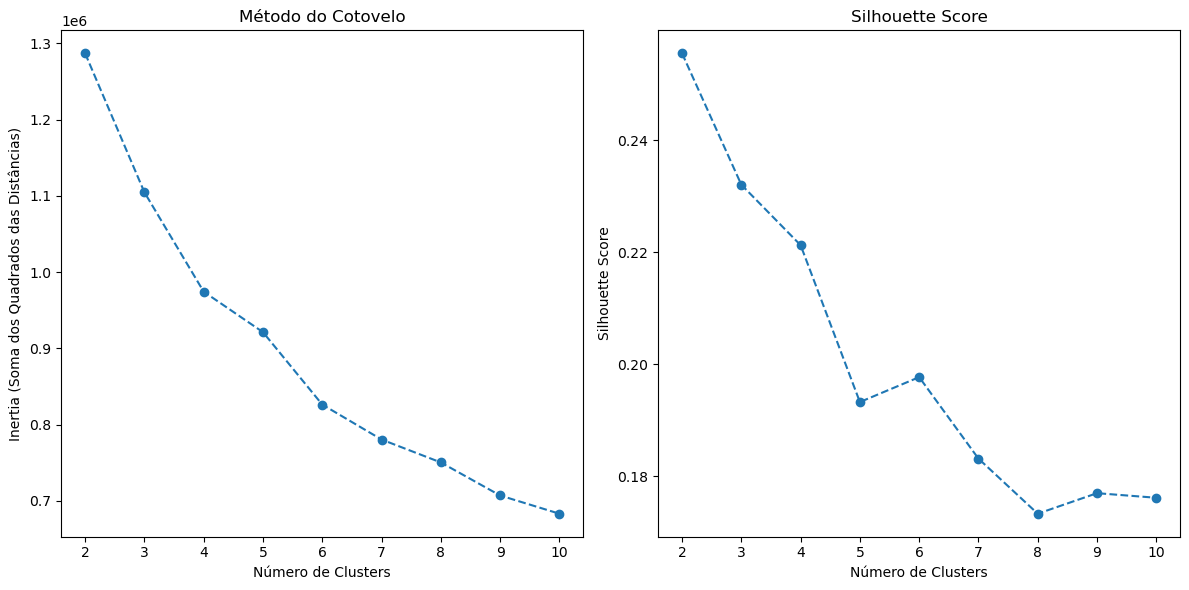

In [58]:
# Método do Cotovelo e Silhouette para encontrar o número ideal de clusters
inertia = []
silhouette_scores = []

for k in tqdm(range(2, 11)):
    kmeans = KMeans(n_clusters = k, random_state = RANDOM_STATE, n_init = 'auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot do Método do Cotovelo
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker = 'o', linestyle = '--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia (Soma dos Quadrados das Distâncias)')
plt.title('Método do Cotovelo')

# Plot do Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker = 'o', linestyle = '--')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [59]:
kmeans2 = KMeans(n_clusters = 2, random_state = RANDOM_STATE, n_init = 'auto')
kmeans2.fit(X)

kmeans3 = KMeans(n_clusters = 3, random_state = RANDOM_STATE, n_init = 'auto')
kmeans3.fit(X)

kmeans4 = KMeans(n_clusters = 4, random_state = RANDOM_STATE, n_init = 'auto')
kmeans4.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=73)

In [60]:
# Redução de dimensionalidade com t-SNE
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 250, random_state = RANDOM_STATE)
X_tsne = tsne.fit_transform(X)

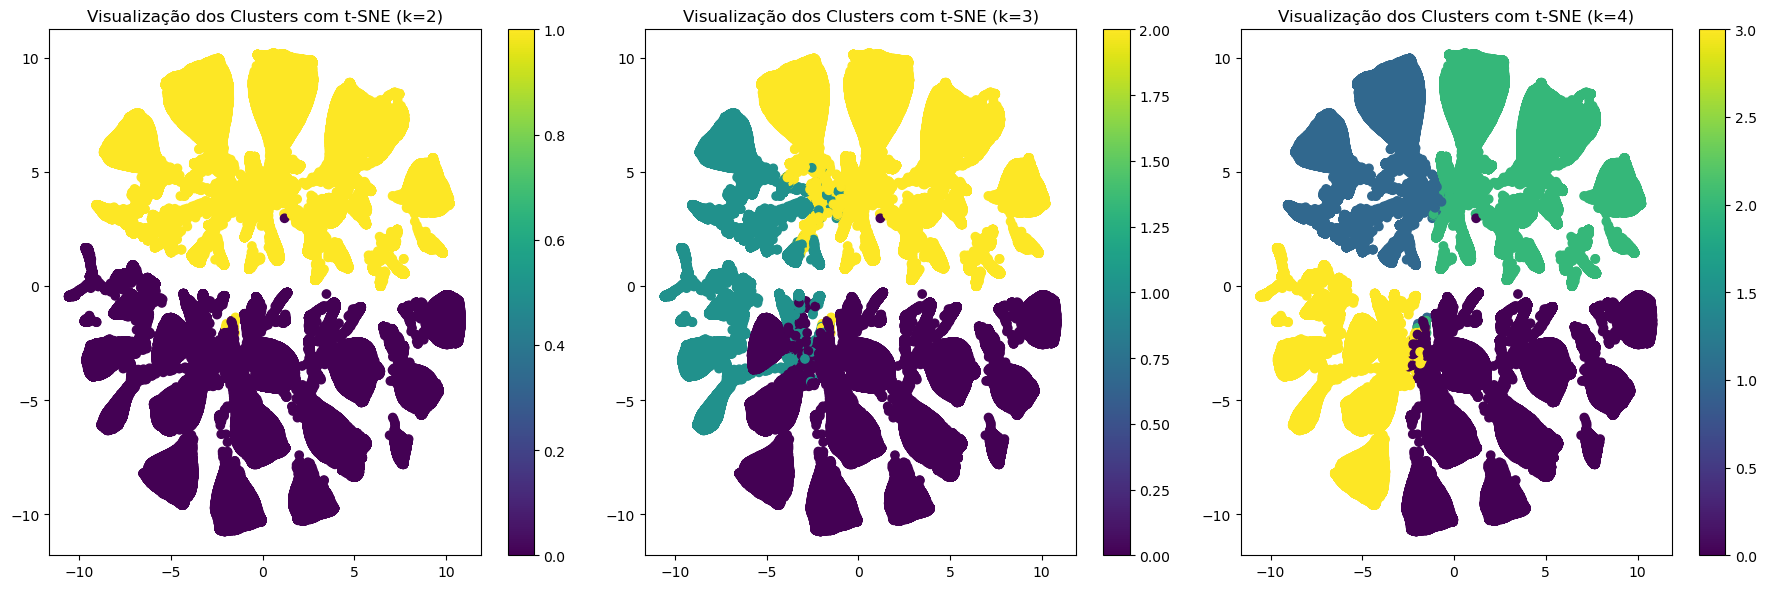

In [61]:
plt.figure(figsize=(18, 6))

# k=2
plt.subplot(131)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans2.labels_, cmap='viridis')
plt.colorbar()
plt.title('Visualização dos Clusters com t-SNE (k=2)')

# k=3
plt.subplot(132)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans3.labels_, cmap='viridis')
plt.colorbar()
plt.title('Visualização dos Clusters com t-SNE (k=3)')

# k=4
plt.subplot(133)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans4.labels_, cmap='viridis')
plt.colorbar()
plt.title('Visualização dos Clusters com t-SNE (k=4)')

plt.tight_layout()
plt.show()

Analisando o resultados, embora a análise do número ideal de clusters tenha apresentado algumas ambiguidades entre o Método do Cotovelo e o Silhouette Score, optamos por selecionar k = 2 com base no índice Silhouette.

Este índice fornece uma métrica mais objetiva da qualidade da clusterização, em que o maior índice indica a maior coesão dentro dos clusters e a melhor separação entre eles.

Foi feito também uma análise dos clusters com k = 4 e a separação não foi significativa, portanto para fins do presente trabalho, manteremos a decisão de apenas 2 clusters.

Vale destacar que o método do cotovelo não mostrou grandes inflexões, o que pode indicar complexidades na estrutura dos dados que não foram resolvidas. No entanto, dado objetivo e necessidades específicas deste estudo, optamos por escolher k = 2 e seguir.

Retornamos com as variáveis nas escalas originais.

In [136]:
df_smote['cluster'] = kmeans2.labels_

In [137]:
display(df_smote.head(10))
display(df_smote.tail(10))

,Gender,approv_in_adv,property_value,income,Credit_Score,age,Region,Status,cluster
0,Male,nopre,0.0,4980.0,552,55-64,North,1,0
1,Male,nopre,0.0,0.0,765,45-54,North,1,0
2,Male,nopre,0.0,8640.0,880,35-44,North,1,0
3,Male,nopre,0.0,1680.0,880,45-54,central,1,1
4,Male,nopre,0.0,7560.0,768,45-54,North,1,0
5,Male,nopre,0.0,5640.0,571,>74,North,1,0
6,Male,nopre,0.0,3840.0,529,55-64,North,1,0
7,Male,nopre,0.0,7200.0,572,45-54,south,1,1
8,Male,nopre,0.0,9660.0,896,35-44,south,1,1
9,Male,nopre,0.0,5100.0,719,25-34,North,1,0


,Gender,approv_in_adv,property_value,income,Credit_Score,age,Region,Status,cluster
218698,Male,nopre,218000.0,3620.488011,827,35-44,central,1,1
218699,Male,nopre,198000.0,4213.509283,591,25-34,North,1,0
218700,Male,nopre,0.0,15000.000000,578,35-44,south,1,1
218701,Joint,nopre,178000.0,3406.961720,750,35-44,south,1,1
218702,Female,nopre,0.0,3780.000000,820,55-64,North,1,0
218703,Joint,nopre,408000.0,6095.673888,722,25-34,North-East,1,0
218704,Joint,nopre,0.0,3900.000000,887,35-44,North-East,1,0
218705,Female,nopre,0.0,3180.000000,674,25-34,North,1,0
218706,Joint,nopre,748000.0,6081.881358,642,65-74,south,1,1
218707,Joint,nopre,528000.0,7939.687599,576,45-54,North,1,0


## Descrever os Clusters

In [138]:
df_smote[df_smote['cluster'] == 0].describe()

,property_value,income,Credit_Score,Status,cluster
count,1.162750e+05,116275.000000,116275.000000,116275.000000,116275.0
mean,3.783729e+05,6349.911637,699.843457,0.506867,0.0
std,3.828793e+05,6437.878277,113.344385,0.499955,0.0
min,0.000000e+00,0.000000,500.000000,0.000000,0.0
25%,1.280000e+05,3180.000000,603.000000,0.000000,0.0
50%,3.180000e+05,5220.000000,699.000000,1.000000,0.0
75%,5.380000e+05,7980.000000,798.000000,1.000000,0.0
max,1.650800e+07,377220.000000,900.000000,1.000000,0.0


In [139]:
df_smote[df_smote['cluster'] == 0]['Status'].value_counts(normalize = True) * 100

1    50.686734
0    49.313266
Name: Status, dtype: float64

In [140]:
df_smote[df_smote['cluster'] == 0]['Gender'].value_counts(normalize = True) * 100

Joint     39.391099
Male      34.688454
Female    25.920447
Name: Gender, dtype: float64

In [141]:
df_smote[df_smote['cluster'] == 0]['approv_in_adv'].value_counts(normalize = True) * 100

nopre    89.100839
pre      10.899161
Name: approv_in_adv, dtype: float64

In [142]:
df_smote[df_smote['cluster'] == 0]['age'].value_counts(normalize = True) * 100

45-54    25.385508
35-44    23.234573
55-64    21.530854
25-34    12.768867
65-74    11.791013
>74       3.384218
<25       1.904967
Name: age, dtype: float64

In [143]:
df_smote[df_smote['cluster'] == 0]['Region'].value_counts(normalize = True) * 100

North         87.765212
North-East    12.234788
Name: Region, dtype: float64

In [144]:
df_smote[df_smote['cluster'] == 1].describe()

,property_value,income,Credit_Score,Status,cluster
count,1.024330e+05,102433.000000,102433.000000,102433.000000,102433.0
mean,3.990104e+05,6372.702083,700.452803,0.492205,1.0
std,3.962593e+05,6316.852319,114.157926,0.499942,0.0
min,0.000000e+00,0.000000,500.000000,0.000000,1.0
25%,1.580000e+05,3180.000000,602.000000,0.000000,1.0
50%,3.280000e+05,5280.000000,700.000000,0.000000,1.0
75%,5.580000e+05,8160.000000,799.000000,1.000000,1.0
max,1.200800e+07,578580.000000,900.000000,1.000000,1.0


In [145]:
df_smote[df_smote['cluster'] == 1]['Status'].value_counts(normalize = True) * 100

0    50.779534
1    49.220466
Name: Status, dtype: float64

In [146]:
df_smote[df_smote['cluster'] == 1]['Gender'].value_counts(normalize = True) * 100

Male      62.452530
Joint     24.996827
Female    12.550643
Name: Gender, dtype: float64

In [147]:
df_smote[df_smote['cluster'] == 1]['approv_in_adv'].value_counts(normalize = True) * 100

nopre    88.711646
pre      11.288354
Name: approv_in_adv, dtype: float64

In [148]:
df_smote[df_smote['cluster'] == 1]['age'].value_counts(normalize = True) * 100

45-54    25.643103
35-44    23.945408
55-64    21.903098
25-34    12.235315
65-74    11.361573
>74       3.412963
<25       1.498541
Name: age, dtype: float64

In [149]:
df_smote[df_smote['cluster'] == 1]['Region'].value_counts(normalize = True) * 100

south         76.828756
central       23.170267
North-East     0.000976
Name: Region, dtype: float64

### Análise dos Clusters

* Ambos os clusters têm uma distribuição de status semelhante, com uma ligeira vantagem para adimplentes no Cluster 1.
* O Cluster 1 tem uma maioria esmagadora de clientes do sexo masculino, enquanto o Cluster 0 tem uma distribuição mais equilibrada entre os sexos.
* Ambos os clusters têm uma baixa proporção de crédito pré-aprovado (10.89% para o Cluster 0 e 11.28% para o Cluster 1).
* As faixas etárias predominantes são semelhantes em ambos os clusters.
* A região é uma diferença marcante, com o Cluster 0 sendo quase exclusivamente na região Norte e o Cluster 1 predominantemente na região Sul.

### Personas

* Cluster 0: Pode representar clientes com imóveis de valor variado, renda diversificada, pontuações de crédito médias, e uma distribuição da adimplência equilibrada. A maioria é da região Norte. A persona escolhida é **"North"**
* Cluster 1: Este cluster é dominado por clientes do sexo masculino, com renda diversificada e pontuações de crédito médias. Eles também têm uma distribuição equilibrada adimplência, e são predominantemente da região Sul. A Persona escolhida é **"South"**.

### Propensão à Fraude

Dadas apenas as informações das colunas escolhidas e sem considerar outros fatores ou análises mais aprofundadas, definir uma propensão à fraude seria um exercício de suposição. Para fins do presente trabalho, vamos, com base na distribuição de status de adimplência sendo o Cluster 0 com 50,69% de inadimplentes e o Cluster 1 com 49,22% de inadimplentes, supor que o Cluster 0 pode ter uma propensão ligeiramente maior à fraude em comparação com o Cluster 1.

Ressaltamos que essa é uma suposição muito simplificada e não deve ser considerada como uma conclusão definitiva. A propensão à fraude depende de uma variedade de fatores e exigiria uma análise mais aprofundada e modelos preditivos para ser determinada com maior precisão.

Definimos então a propensão à fraude como:
* Cluster 0: > 0.5
* Cluster 1: <= 0.5

### Export do Modelos KMeans de clusterização e StandardScaler

In [150]:
joblib.dump(scaler, './loan_scaler.joblib')

['./loan_scaler.joblib']

In [151]:
joblib.dump(kmeans2, './loan_kmeans.joblib')

['./loan_kmeans.joblib']

Os modelos criados aqui serão agora utilizados em uma aplicação Flask que será executada em Docker numa VM da Microsoft Azure, gerando uma API que poderá ser consumida a partir de um notebook no Google Colab ou ser acessada diretamente através do Front-end desenvolvido para este fim.